In [3]:
import gym
import numpy as np
import random 
import sys
import matplotlib.pyplot as plt

terminal_output = open(1, 'w') #print logs to terminal

# env = gym.make("FrozenLake-v1")
env = gym.make('Taxi-v3')
env.reset()                    
env.render()

+-----------------+
|R: | : : : : | :G|
| : | : : : : | : |
| : | : : : : | : |
| : : : : : : : : |
| : : : | : : : : |
| : : : | : : : : |
| : : : | : : : : |
| : : : | : : : : |
|Y: : : | : : :B: |
+-----------------+



In [4]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(6)
Observation space:  Discrete(1620)


In [5]:
state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))
qtable_history = []
score_history = []
# print(qtable)

In [6]:
# hyperparameters
learning_rate = 0.8
gamma = 0.9  # Discounting rate, aka gamma
epsilon = 1.0
max_epsilon = 1.0    # Exploration probability at start
min_epsilon = 0.01   # Minimum exploration probability 
decay_rate= 0.00005    # Exponential decay rate for exploration prob

# training variables
total_episodes = 250000
max_steps = 1000 # per episode

In [7]:
# List of rewards
rewards = []
steps_total = []
passNrLast100 = 0
passNr = 0
# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    print("running episode: "+ str(episode), file=terminal_output)
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            #print("action random", action)
            
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    steps_total.append(step)
    if reward == 2000:
        passNr += 1
        
    if reward == 2000 and episode>=(total_episodes-100):
        passNrLast100 += 1
        
    if episode % 10000 == 0:
        print('Episode: {} Reward: {} Episode reward: {} Steps Taken: {} Pasiekė tikslą: {}'.format(episode, reward, total_rewards, step, passNr))
    
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)
        # save_canvas(qtable, 800, 800, filename = "./output/FrozenLake_ep" + str(episode_count) + ".png")


Episode: 0 Reward: -1000 Episode reward: -313687 Steps Taken: 999 Pasiekė tikslą: 0
Episode: 10000 Reward: -1 Episode reward: -193807 Steps Taken: 999 Pasiekė tikslą: 14
Episode: 20000 Reward: -1 Episode reward: -137863 Steps Taken: 999 Pasiekė tikslą: 32
Episode: 30000 Reward: -1 Episode reward: -75925 Steps Taken: 999 Pasiekė tikslą: 47
Episode: 40000 Reward: -1 Episode reward: -53947 Steps Taken: 999 Pasiekė tikslą: 67
Episode: 50000 Reward: -1 Episode reward: -31969 Steps Taken: 999 Pasiekė tikslą: 81
Episode: 60000 Reward: -1 Episode reward: -18982 Steps Taken: 999 Pasiekė tikslą: 96
Episode: 70000 Reward: -1 Episode reward: -10990 Steps Taken: 999 Pasiekė tikslą: 111
Episode: 80000 Reward: -1 Episode reward: -7993 Steps Taken: 999 Pasiekė tikslą: 134
Episode: 90000 Reward: -1 Episode reward: -9991 Steps Taken: 999 Pasiekė tikslą: 151
Episode: 100000 Reward: -1 Episode reward: -4996 Steps Taken: 999 Pasiekė tikslą: 175
Episode: 110000 Reward: -1 Episode reward: -7993 Steps Taken: 

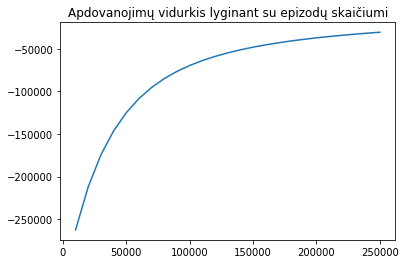

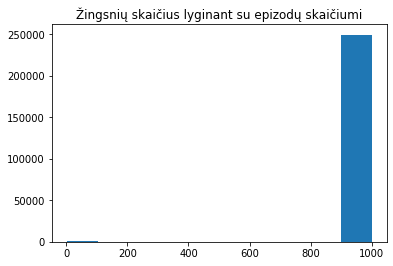

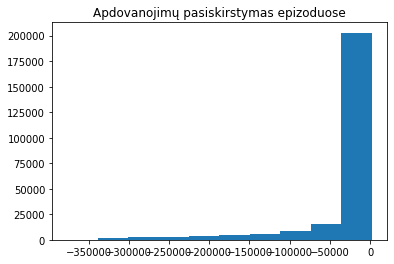

Dalis epizodų kurie pasiekė tikslą: 0.00184
Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): 0.0
Vidutinis žingsnių skaičius: 997.18
Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): 999.00


In [8]:
plt.plot(list(range(0, total_episodes+1, round((total_episodes+1)/len(score_history))))[1:], score_history)
plt.title("Apdovanojimų vidurkis lyginant su epizodų skaičiumi")
plt.show()

plt.hist(steps_total, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

plt.hist(rewards, align='mid')
plt.title("Apdovanojimų pasiskirstymas epizoduose")
plt.show()

print("Dalis epizodų kurie pasiekė tikslą: {0}".format(passNr/total_episodes))
print("Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): {0}".format(passNrLast100/100))

print("Vidutinis žingsnių skaičius: %.2f" % (sum(steps_total)/total_episodes))
print("Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): %.2f" % (sum(steps_total[-100:])/100))

In [ ]:
env.reset()
amountsPassed = 0
amountToTest = 100
steps_total_test = []
for episode in range(amountToTest):
    state = env.reset()
    step = 0
    done = False
    # print("****************************************************")
    # print("EPISODE ", episode)
    # env.render()
    
    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        # env.render()
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            if reward == 2000: 
                amountsPassed += 1
            # env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            steps_total_test.append(step)
            break
        state = new_state
print("Trained model passed: "+str(amountsPassed) + " out of " + str(amountToTest))
env.close()


In [ ]:
plt.hist(steps_total_test, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

print("Vidutinis žingsnių skaičius per testą: %.2f" % (sum(steps_total_test)/amountToTest))